In [189]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [126]:
import pickle
with open('df_complete.pickle', 'rb') as f:
    df = pickle.load(f)

In [190]:
columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'thal']

In [191]:
x = df.loc[:, columns].values# Separating out the target
y = df['num'].values

# **PCA**

In [192]:
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(x)

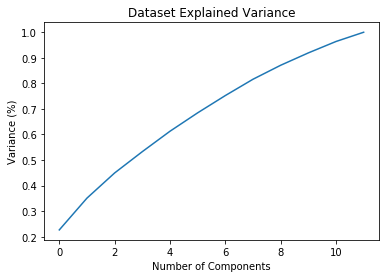

In [194]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [146]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(data_rescaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9'])





In [147]:
pcs = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9']

In [148]:
finalDf = pd.concat([principalDf, df[['num']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,num
0,0.858029,-2.932888,-1.107784,2.276689,-1.297048,1.513543,0.914365,-1.524013,0.317597,0.0
1,1.971019,-1.384546,1.179431,-1.113574,0.669477,-0.521896,-0.253208,-1.429766,-1.096970,1.0
2,2.472333,-0.649489,0.551940,-1.405598,-0.808597,0.957253,0.918250,0.379234,-0.383231,1.0
3,-0.776553,0.188550,2.228445,1.867206,-2.213022,0.287361,1.426857,-1.002125,1.381855,0.0
4,-2.831553,-1.372445,0.765639,-1.479081,0.246012,0.481373,0.856437,-0.428590,1.043067,0.0
...,...,...,...,...,...,...,...,...,...,...
915,-0.557741,-0.528317,-1.597866,0.813558,0.040814,0.595538,2.112669,-0.375392,-0.415864,1.0
916,0.912672,-0.441451,-1.561786,0.374332,-0.628247,0.714216,-2.256752,0.050079,-0.541270,1.0
917,0.424901,-2.748785,-0.699302,0.010666,-1.877424,0.305274,-1.108329,0.233408,-0.340550,0.0
918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


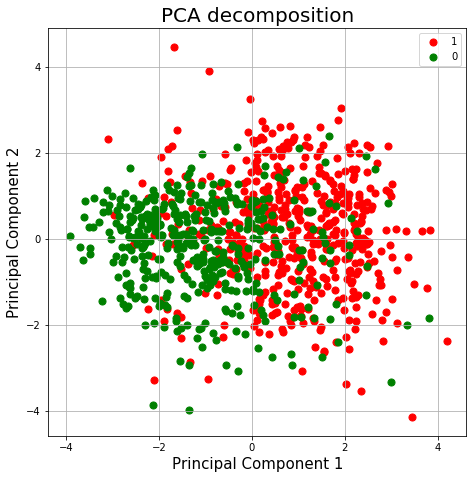

In [195]:
fig = plt.figure(figsize = (7.5,7.5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA decomposition', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['num'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()